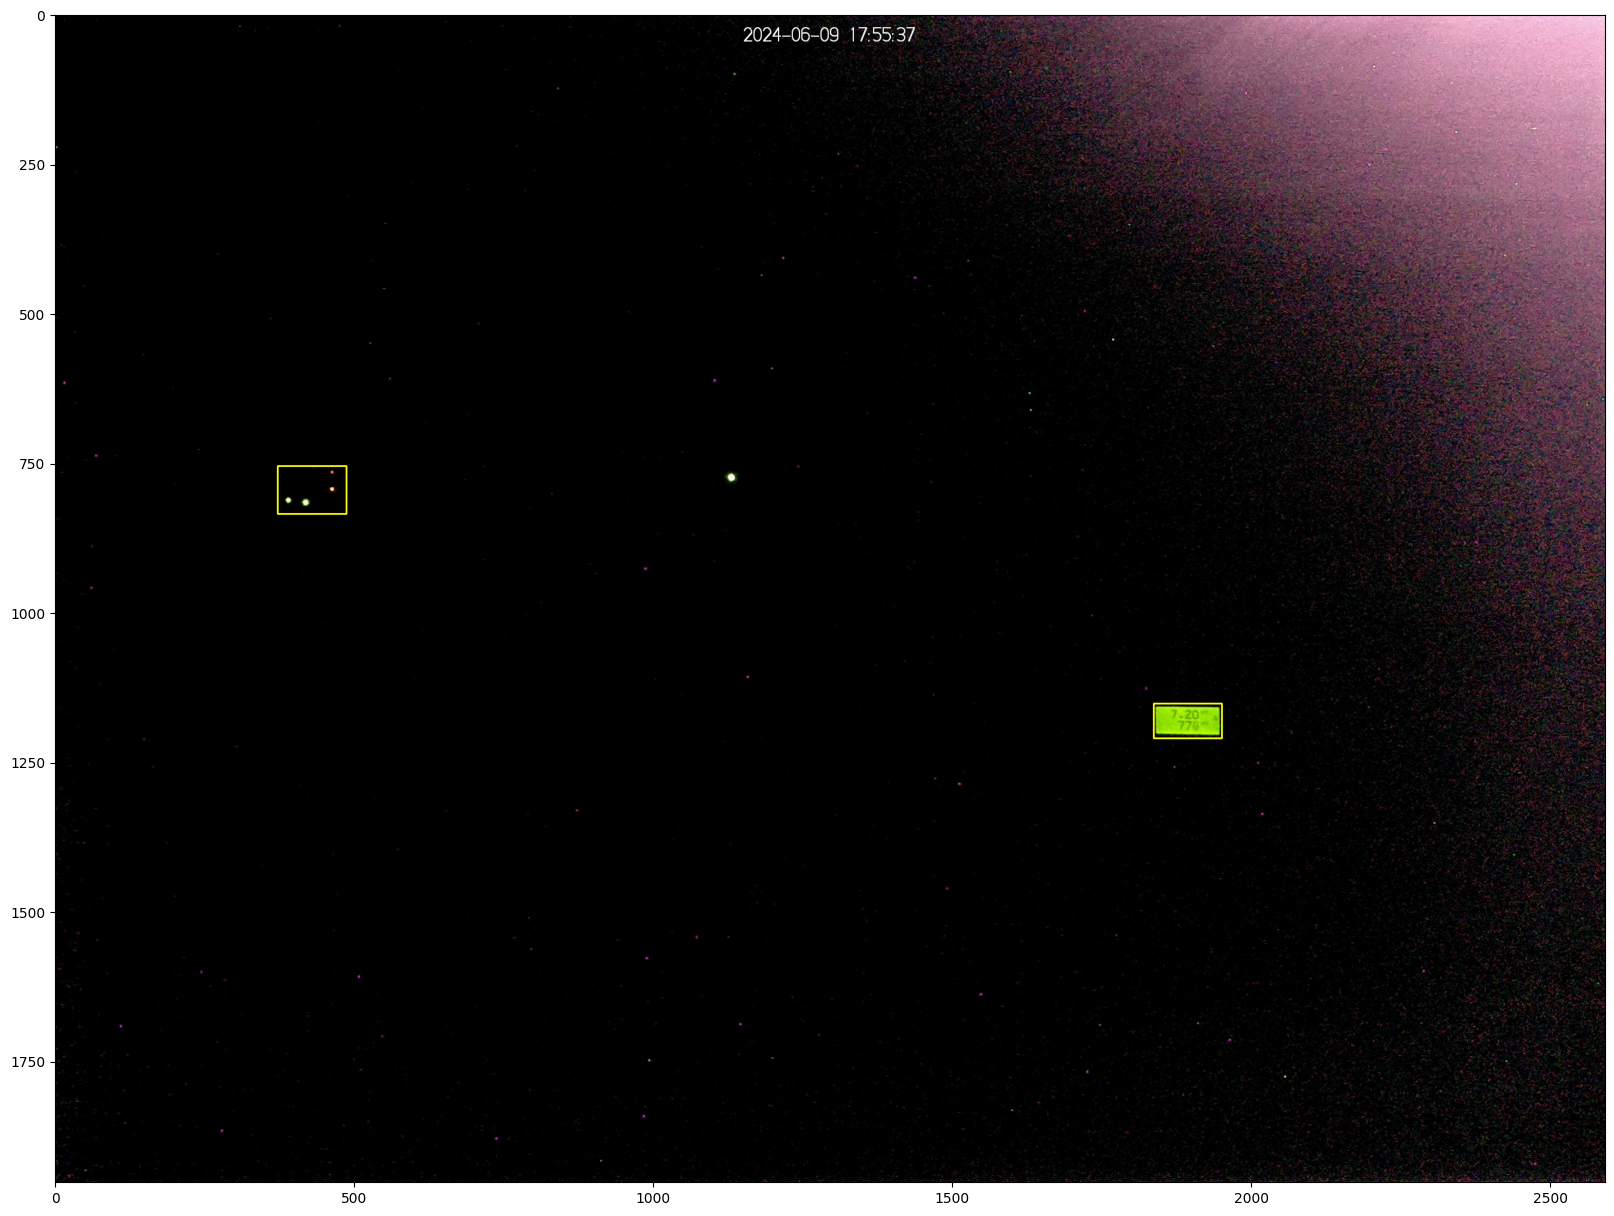

In [19]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import yaml
import cv2 
from matplotlib import pyplot as plt
import numpy as np

def draw_rectangle(image, rectangle_origin, rectangle_size):
    color = (0, 255, 255) 
    thickness = 2

    start_point = (rectangle_origin[0], rectangle_origin[1])
    end_point = (rectangle_origin[0] + rectangle_size[0], rectangle_origin[1] + rectangle_size[1])

    return cv2.rectangle(image, start_point, end_point, color, thickness)

with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

#print(config)

image = cv2.imread("samples/4.jpg")
image = draw_rectangle(image, config["leds"]["rectangle_origin"], config["leds"]["rectangle_size"])
image = draw_rectangle(image, config["lcd"]["rectangle_origin"], config["lcd"]["rectangle_size"])

plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


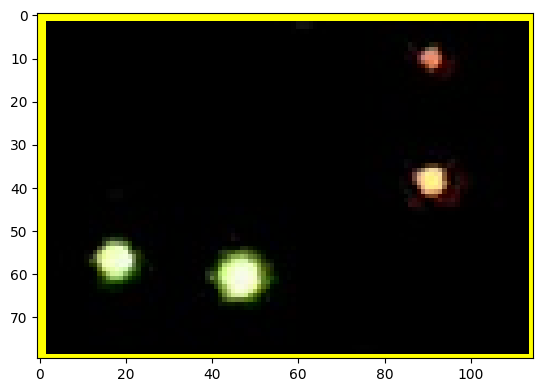

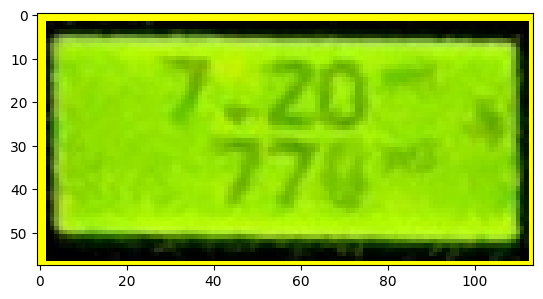

In [20]:
def crop_rectangle(image, rectangle_origin, rectangle_size):

    return image[rectangle_origin[1]:rectangle_origin[1]+rectangle_size[1], rectangle_origin[0]:rectangle_origin[0]+rectangle_size[0]]

leds = crop_rectangle(image, config["leds"]["rectangle_origin"], config["leds"]["rectangle_size"])
lcd = crop_rectangle(image, config["lcd"]["rectangle_origin"], config["lcd"]["rectangle_size"])

#plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(leds, cv2.COLOR_BGR2RGB))
plt.show()

#plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(lcd, cv2.COLOR_BGR2RGB))
plt.show()

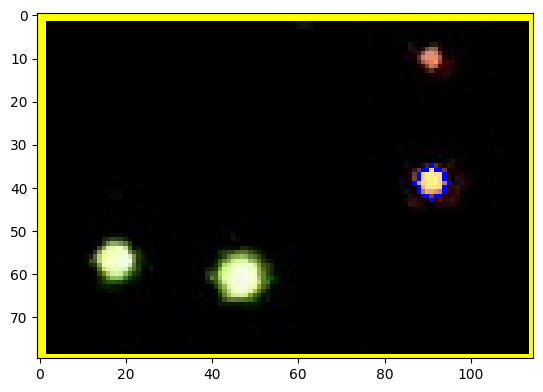

avg_empty_indicator: (182.0816326530612, 119.42857142857142, 139.12244897959184)


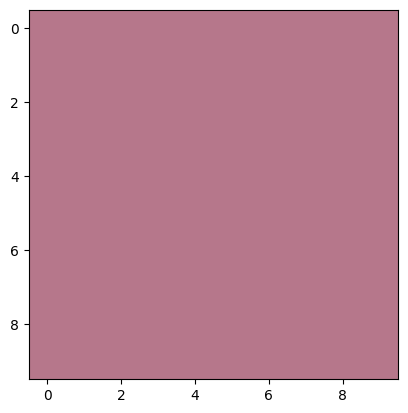

In [28]:
leds_visual = cv2.circle(leds, (config["leds"]["empty_indicator"]["origin"][0], config["leds"]["empty_indicator"]["origin"][1]), config["leds"]["empty_indicator"]["radius"], (255,0,0), 1)
plt.imshow(cv2.cvtColor(leds_visual, cv2.COLOR_BGR2RGB))
plt.show()

gray = cv2.cvtColor(leds, cv2.COLOR_BGR2GRAY)
mask_empty_indicator = np.zeros_like(gray)
cv2.circle(mask_empty_indicator, (config["leds"]["empty_indicator"]["origin"][0], config["leds"]["empty_indicator"]["origin"][1]), config["leds"]["empty_indicator"]["radius"], 255, -1)

avg_empty_indicator = cv2.mean(leds, mask=mask_empty_indicator)[:3]
print("avg_empty_indicator:", avg_empty_indicator)
box = np.zeros((10,10,3), np.uint8)
cv2.rectangle(box,(0,0),(10,10),(avg_empty_indicator),-1)
plt.imshow(box)
plt.show()